# Классификация распределений на основе характеристик случайных графов
Работу выполнила Иванова Анастасия. Распределения Лапласа и косое нормальное
*  Косое нормальное распределение с параметром по умолчанию skew_alpha = 1

*  Распределение Лапласа с параметрами по умолчанию laplace_alpha = 0, laplace_beta = $\sqrt{\frac{1}{2}}$

* Характеристика для KNN графа - количество треугольников

* Характеристика для dist графа - размер максимального независимого множества

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import skewnorm
import networkx as nx
from typing import Callable
from graph import *
from graph_characteristic import *
from graph_simulate_statistics import *

# Часть I

Примеры построения графов

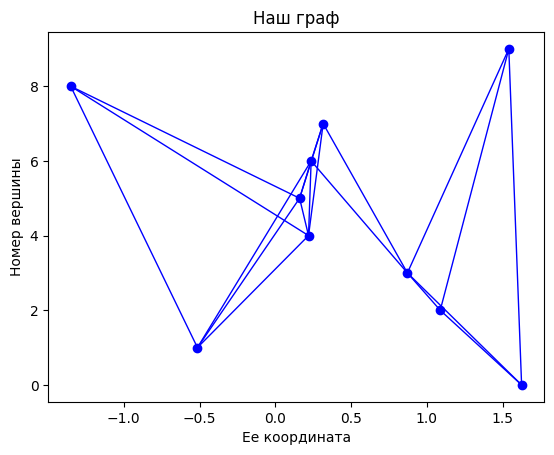

In [ ]:
knn_skew_normal = Graph(points = gen_skewnormal_points(10))
knn_skew_normal.build_KNN_graph(K = 3)
knn_skew_normal.draw()

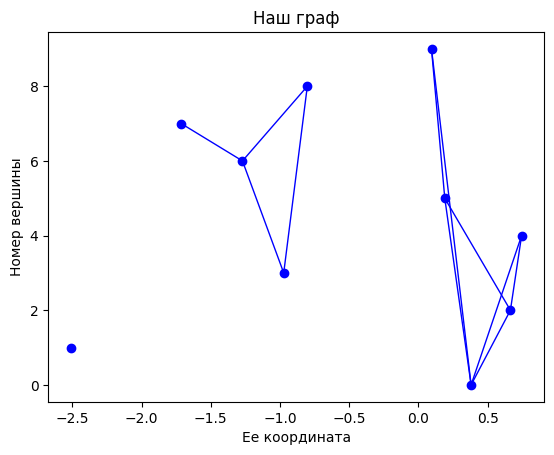

In [ ]:
dist_laplace = Graph(points = gen_laplace_points(10))
dist_laplace.build_dist_graph(max_dist = 0.5)
dist_laplace.draw()

<h1>Часть 1.1</h1>

Исследуем зависимость характеристик в зависимости от параметров распределения $\alpha_{laplace},\  \beta_{laplace}, \ \alpha_{skew-normal}$ при фиксированном размере выборке и параметрах графа

* Количество экспериментов = 200

* Размер графа = 40

* Параметр K в KNN = 3

* Параметр dist в Disatnce = 1



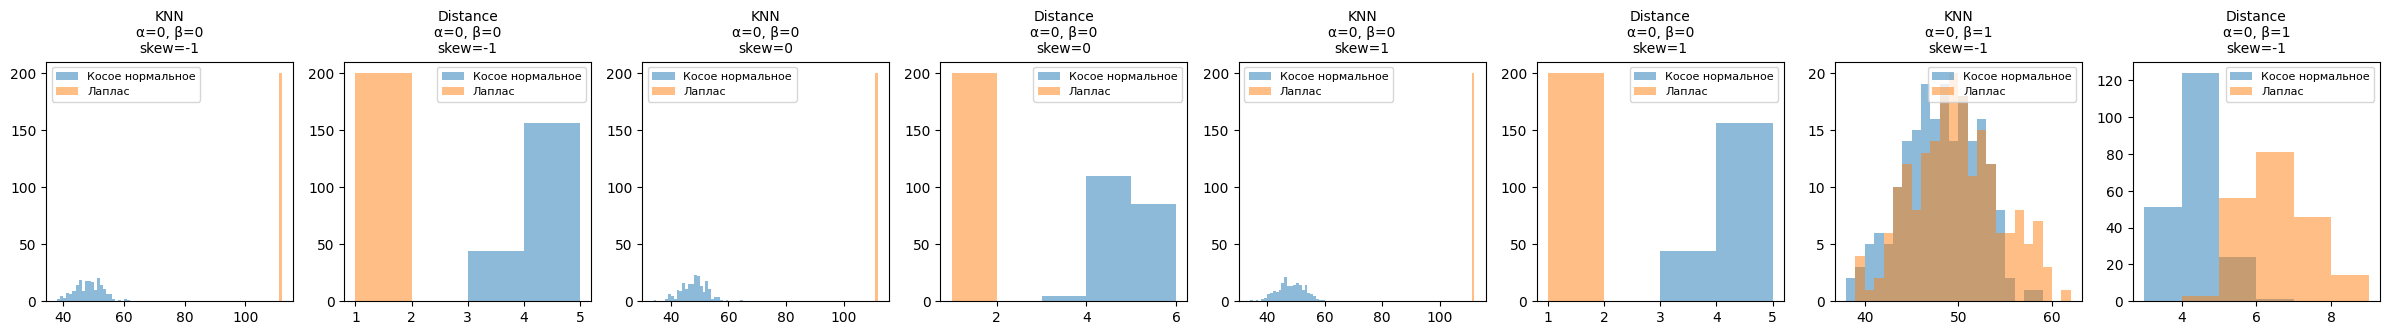

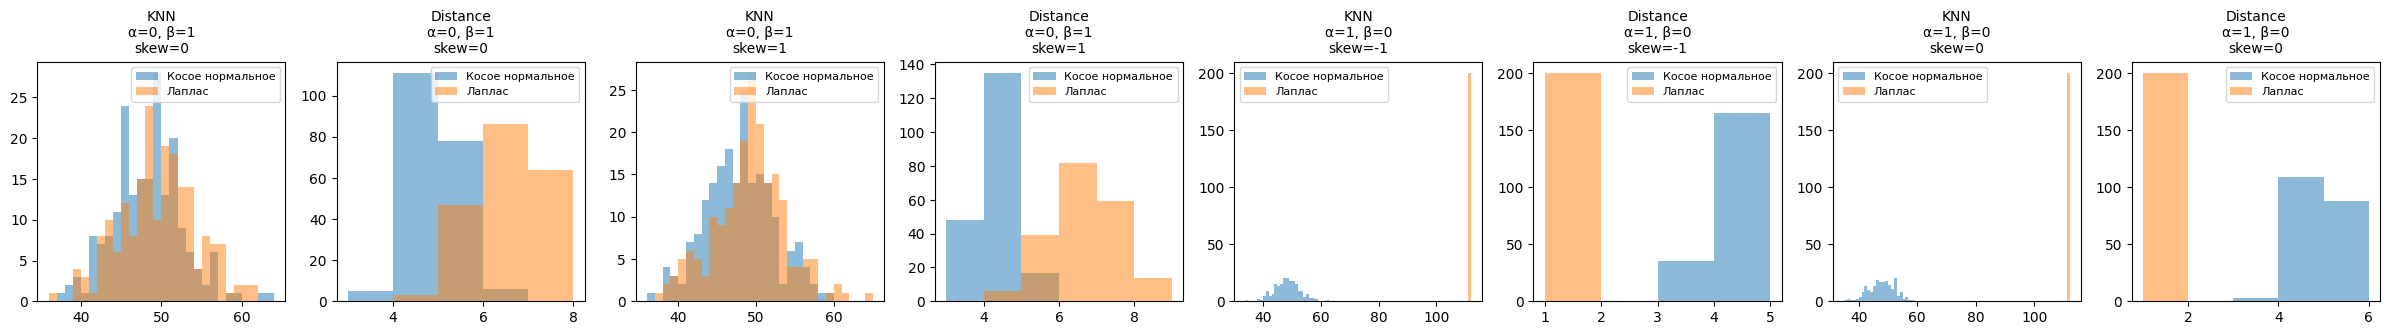

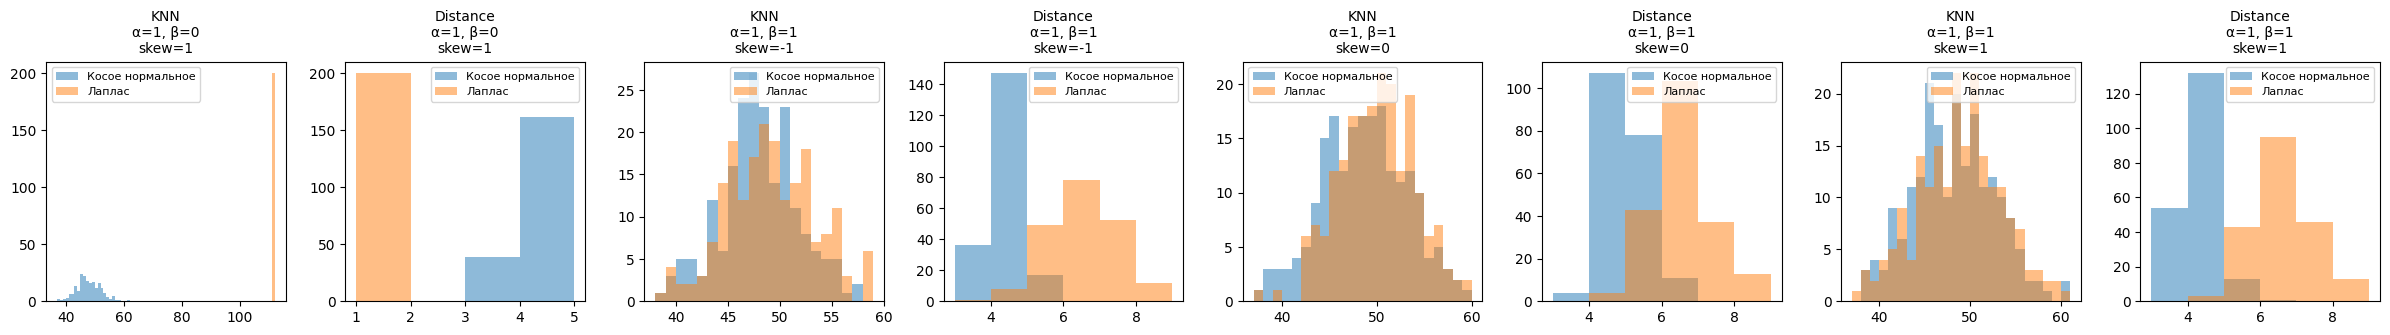

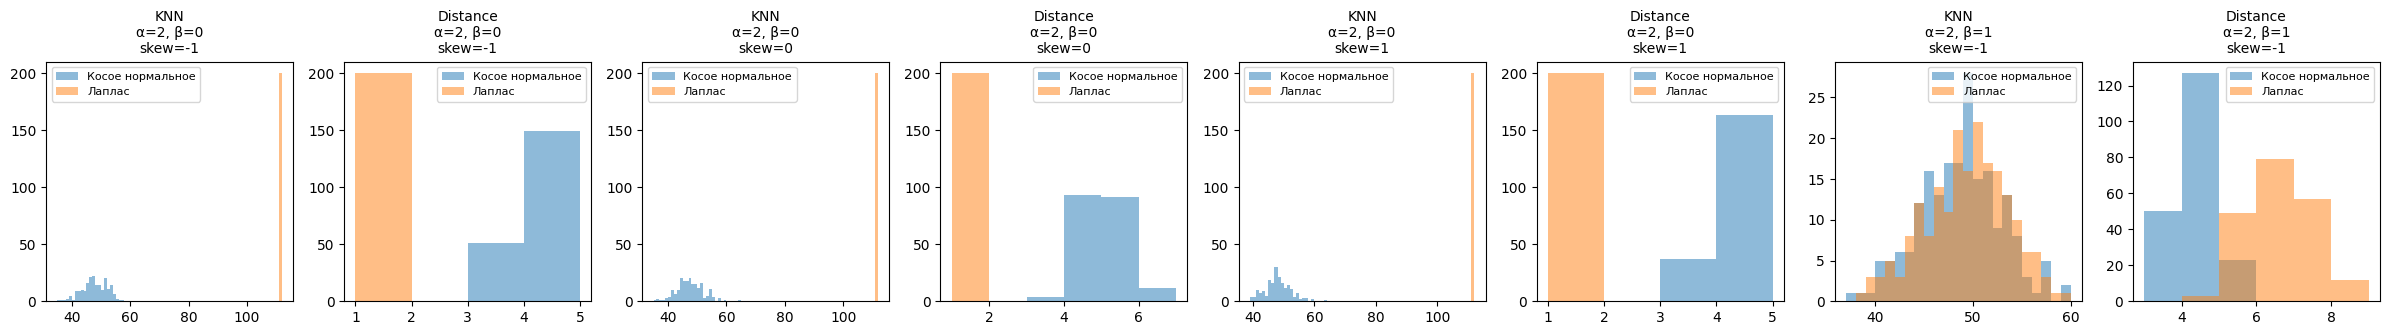

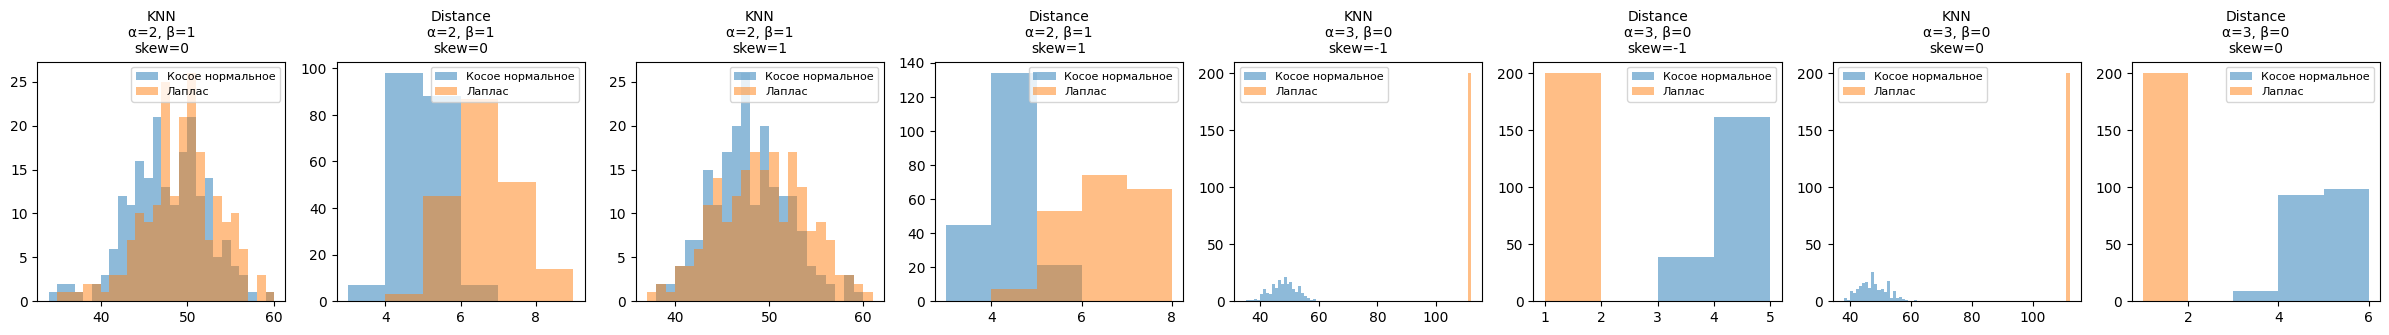

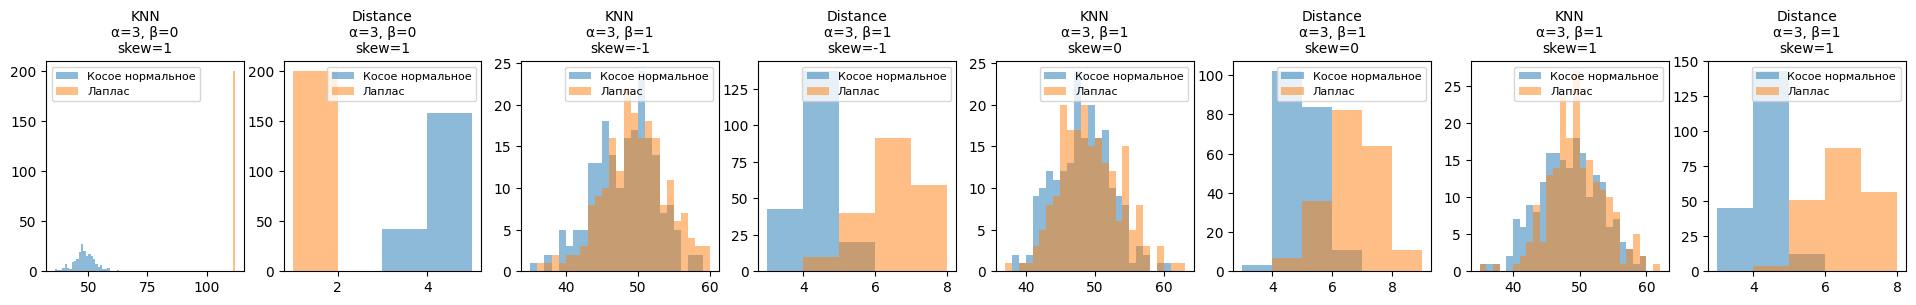

In [ ]:
laplace_alphas = [0, 1, 2, 3]
laplace_betas = [0, 1]
skew_norm_alphas = [-1, 0, 1]

plot_distribution_parameter_combinations(laplace_alphas, laplace_betas, skew_norm_alphas)

<h3> Вывод</h3>

При некоторых параметрах распределений (например $\alpha_{laplace} = 1, \beta_{laplace} = 0, \alpha_{skew} = 1 $) определить распределения крайне легко



<h1>Часть 1.2</h1>

Теперь зафиксируем $\alpha_{laplace},\  \beta_{laplace}, \ \alpha_{skew-normal}$ и посмотрим на зависимость характеристик от процедуры построения графа




**Рассмотрим зависимость значений характеристик KNN графа от количества соседей**





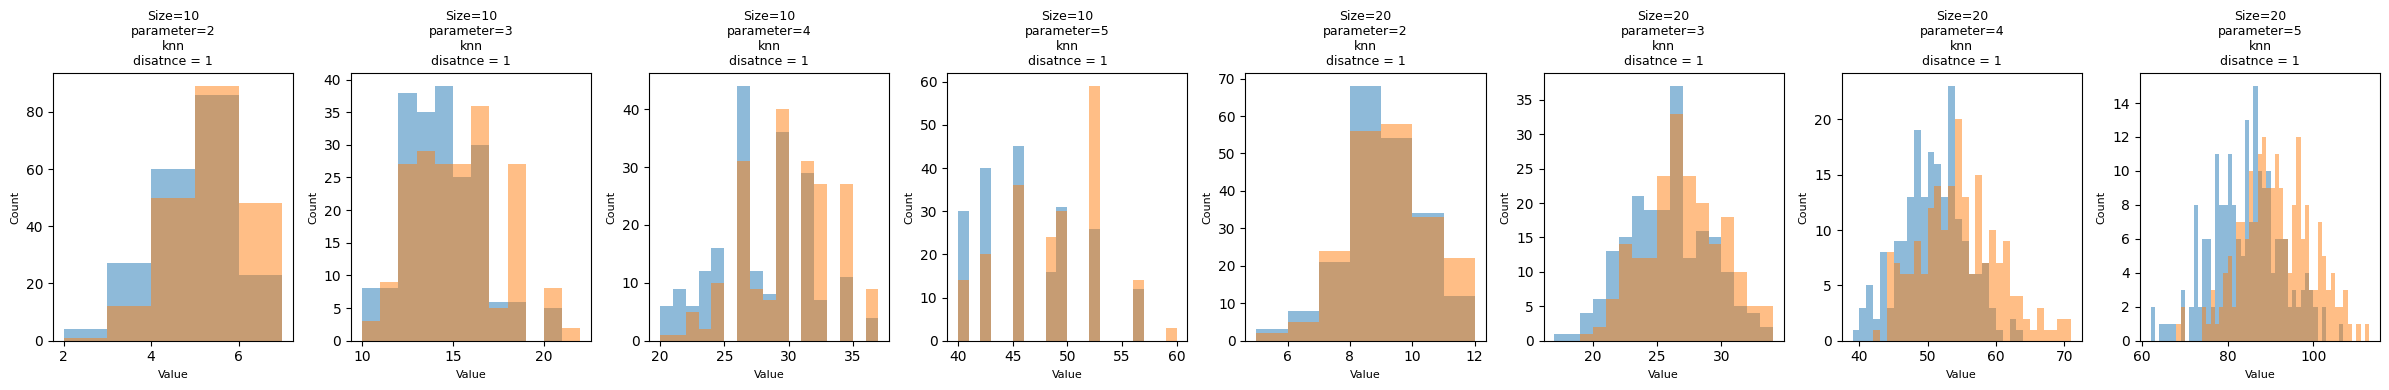

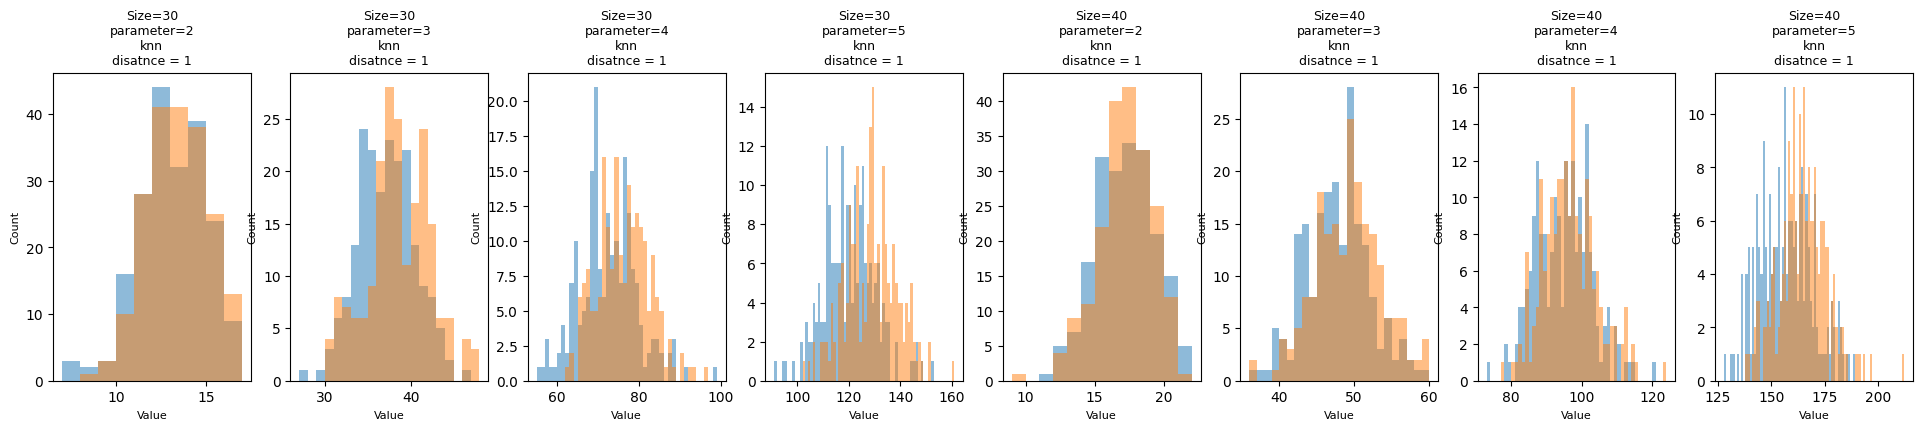

In [ ]:
sizes = [10, 20, 30, 40]
neighbours = [2, 3, 4, 5]

plot_graphs_parameter_combinations(sizes=sizes, neighbours=neighbours, graph_type='knn')

<h3>Вывод</h3>

Видим, что конечно распределение и значение кол-ва треугольников меняется, но при этом распределения друг от друга очень слоно отличить, они практически идентичны



**Теперь посмотрим на ависимость значений характеристик dist графа от дистанций**

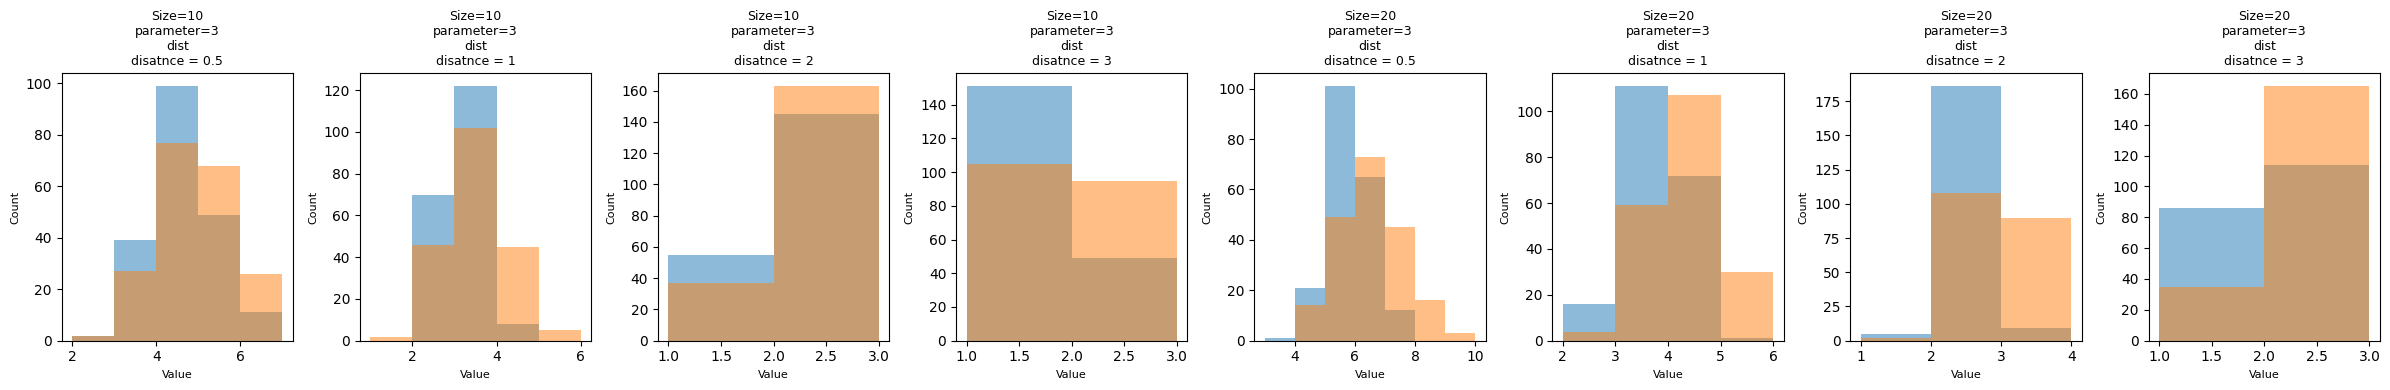

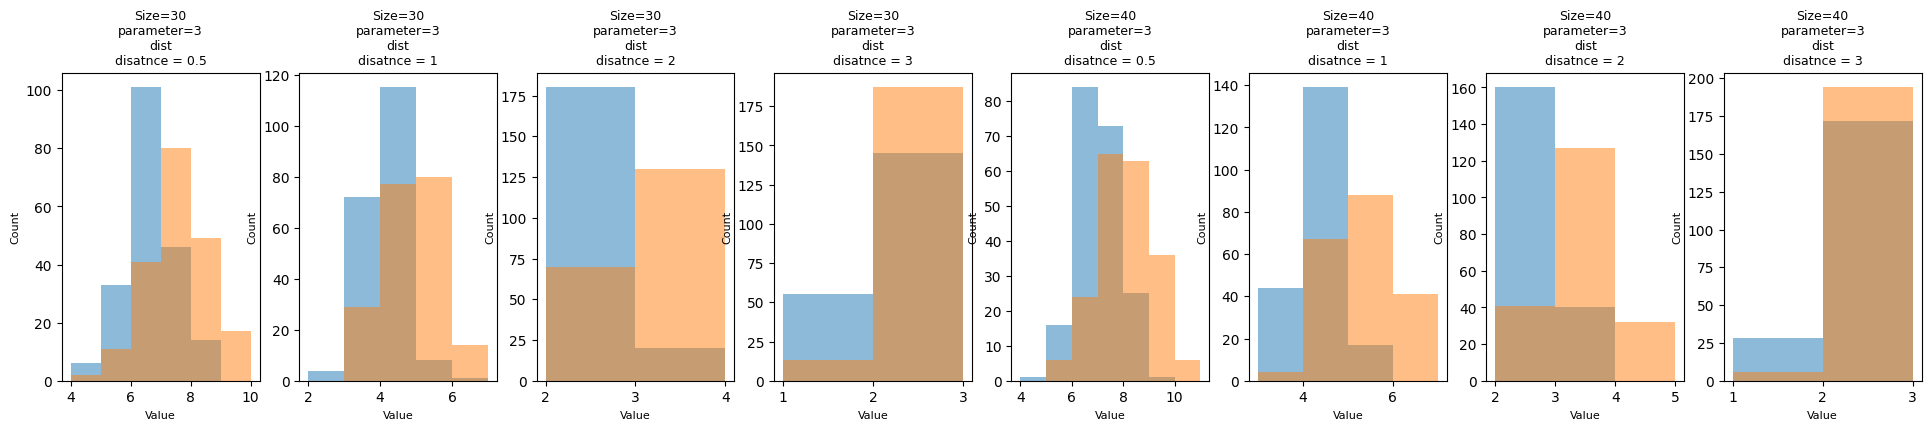

In [ ]:
sizes = [10, 20, 30, 40]
distances = [0.5, 1, 2, 3]
plot_graphs_parameter_combinations(sizes=sizes, dists=distances, graph_type="dist")

<h3>Вывод</h3>

Тут уже стало немножко лучше, в некоторых случаях по размеру независимого множества можно определить какое распределение, но все еще пересечения достаточно существенные

<h1>Часть 1.3</h1>

Построим теперь критическое множество А, зафиксировав параметры распределения и процедуру построения графа

Множество А будем строить так :
* генерируем датасет (в качестве основного распределения зафиксируем косое нормальное)
* считаем значения характеристики (размер максимального независимого множества)
* отсекаем 95 перцентиль



In [ ]:
# Построение A_crit
A_crit = build_critical_region()
print(f"Критическое значение A_crit: {A_crit}")

# Оценка мощности
power, approved = estimate_power(A_crit)
print(f"Мощность критерия: {power:.8f}")
print(f"Ошибка 1 рода : {1 - approved:.8f}")

Критическое значение A_crit: 5
Мощность критерия: 0.30330000
Ошибка 1 рода : 0.00270000


<h2>Вывод</h2>

Получается критическое множество А = [0, 5]

Итого, получили неплохую мощность в 30% с ошибкой первого рода всего 0.027 (2.7%)